# this is a title for the section
## this is subsection 
### this is subsubsection

this is a _sentence_

**bold face**

`monospace`


that is an apple


 




In [1]:
a = 1
b = 2 
print (a+b)



3




# Heading 1 (Highest level)
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6 (Lowest level)


this is my list for shopping

- eggs
- water
- bread

* eggs
* water
* bread


1. eggs
2. water
3. bread


### To add a link in Markdown, you can use the following format: \[Link Text\](URL)

+ [Google](https://www.google.com)
+ [this is a link to a file](https://www.google.com)

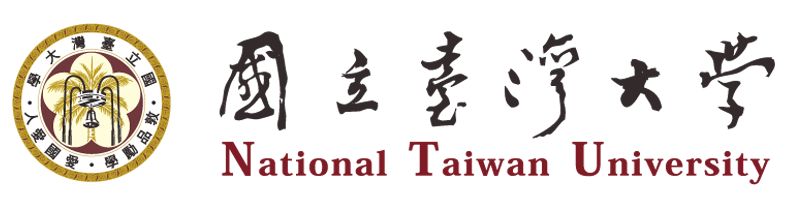


<img src="./NTU_logo.png" width="200" height="200">




```python

a = 1
b = 2 
print (a+b)

```


```python
import numpy as np
import matplotlib.pyplot as plt
Radius_data = np.array([0.0,0.2,0.4,0.6,0.8,1.0]) # six data points
print Radius
```



```cpp
int main() 
{
  int y = 3;
  int x = 5 + 6;
  cout << "Hello World! " << x << std::endl();
}
```






$$a + b = 10$$

$$2a + c = 5$$


please find $a$ and $b$? 




- Consider a quadratic equation

$$ax^2 + bx + c = 0.$$




$$x_{1,2} = \frac{-b \pm \sqrt{b^2 - 4 a c }}  {2a}$$



$$A = \pi r^2$$





|ITEM |Quantity|Price|
|-----|--------|-----|
|Apple| 4      | 10  |
|Egg  | 5      | 23  |



|ITEM |Quantity|Price|
|:-----|:--------:|-----:|
|Apple| 4      | 10  |
|Egg  | 5      | 23  |


In [5]:
import decimal as dm
#import decimal as abcdefg 

# no errors
print ("\n== No Errors == ")

print (dm.Decimal(0.5))



print (dm.Decimal(0.1))


== No Errors == 
0.5
0.1000000000000000055511151231257827021181583404541015625


In [8]:
import decimal as dm
# no errors
print ("\n== No Errors == ")
print ('1.5 =', dm.Decimal(1.5))
print ('0.125 =',dm.Decimal(0.125))
print ('1.5 + 0.125 =', dm.Decimal(1.5+0.125))
# Approximation
print ("\n== Some Errors == ")
print ('0.1 !=', dm.Decimal(0.1))
print ('0.2 !=',dm.Decimal(0.2))
print ('0.1 + 0.2 !=', dm.Decimal(0.1+0.2))


== No Errors == 
1.5 = 1.5
0.125 = 0.125
1.5 + 0.125 = 1.625

== Some Errors == 
0.1 != 0.1000000000000000055511151231257827021181583404541015625
0.2 != 0.200000000000000011102230246251565404236316680908203125
0.1 + 0.2 != 0.3000000000000000444089209850062616169452667236328125


In [9]:
name = input("What is your name? ")# Read data from user
print ("Hello, %s." % name)





What is your name? John
Hello, John.


In [13]:
name = 'John'#define data here 
print ("Hello, %s." % name)
 

"""
add something for human 
computers will ignore these 
i have too many things to write down here 
"""

print ("Hello, %s." % name)
 



Hello, John.
Hello, John.


In [18]:


import datetime as dt # import datetime module, call it "dt"
now = dt.datetime.now() #submodule
print (now)

print ("Current date and time:")
print ("Current year: %d" % now.year)
print ("Current month: %d" % now.month)
print ("Current day: %d" % now.day)
#====
print ("Current hour: %d" % now.hour)
print ("Current minute: %d" % now.minute)
print ("Current second: %d" % now.second)

2024-09-12 13:46:47.349924
Current date and time:
Current year: 2024
Current month: 9
Current day: 12
Current hour: 13
Current minute: 46
Current second: 47


In [29]:
a = '123'
print (type(a))

a = float(a)
print (type(a))


<class 'str'>
<class 'float'>


In [22]:
a + a

print (type(a))

<class 'str'>


In [23]:
b + b
print (type(b))

<class 'int'>


In [30]:
a = input("pick a number ? ")
a = float(a)
print ("a + a= ", a+a)

pick a number ? 123
a + a=  246.0
